# HANDWRITTEN DIGIT RECOGNITION



In [1]:
import pyscreenshot as ImageGrab

In [10]:

import time
images_folder="Capture_Images/5/"

for i in range(0,100):
   time.sleep(8)
   im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

saved...... 0
clear screen now and redraw now........
saved...... 1
clear screen now and redraw now........
saved...... 2
clear screen now and redraw now........
saved...... 3
clear screen now and redraw now........
saved...... 4
clear screen now and redraw now........
saved...... 5
clear screen now and redraw now........
saved...... 6
clear screen now and redraw now........
saved...... 7
clear screen now and redraw now........
saved...... 8
clear screen now and redraw now........
saved...... 9
clear screen now and redraw now........
saved...... 10
clear screen now and redraw now........
saved...... 11
clear screen now and redraw now........
saved...... 12
clear screen now and redraw now........
saved...... 13
clear screen now and redraw now........
saved...... 14
clear screen now and redraw now........
saved...... 15
clear screen now and redraw now........
saved...... 16
clear screen now and redraw now........
saved...... 17
clear screen now and redraw now........
saved...... 18
clear

# GENERATE DATASET

In [11]:
import cv2
import csv
import glob

header=["label"]

for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv','a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
    dirList = glob.glob("Capture_Images/"+str(label)+"/*.png")
    
    for img_path in dirList:
        im= cv2.imread(img_path)
        im_gray= cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi= cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        rows,cols= roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv','a') as f:
            writer=csv.writer(f)
            writer.writerow(data)
                

In [12]:
import pandas as pd
from sklearn.utils import shuffle

# LOAD DATASET

In [2]:
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
370,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,6,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#separation of dependent and independent variable
X = data.drop(["label"],axis=1)
Y= data["label"]

0


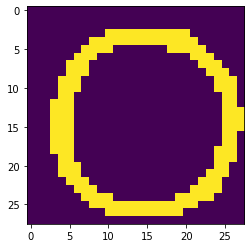

In [13]:
#preview of one image using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 90
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [14]:
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [15]:
#Fit the model using svc and also to save the model using joblib
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x.values,train_y.values)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [16]:
#calculate accuracy
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.97


C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [10]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model= joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
    img=ImageGrab.grab(bbox=(60,170,400,500))
   
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)

    #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)

    rows,cols=roi.shape

    X = []
    
    for i in range(rows):
        for j in range(cols):
            k=roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
    predictions=model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im,"Prediction is: "+str(predictions[0]),(20,20),0,0.8,(0,255,0),2,cv2.LINE_AA)
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(1000)
    if cv2.waitKey(1)==13:
        break
        
cv2.destroyAllWindows()
        


Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 6
Prediction: 7
Prediction: 7
Prediction: 5
Prediction: 5
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 6
Prediction: 4
Prediction: 4
Prediction: 7
Prediction: 7
Prediction: 7


KeyboardInterrupt: 